# Задача обучения без учителя.

## Кластеризация (Unsupervised learning)

**Дано:**<br>
$X$ - пространство объектов;<br>
$\{x_1, \ldots, x_l\}\subset X$ - обучающая выборка (training sample);<br>
$\rho: X\times X\rightarrow[0,\infty)$ - функция расстояний между объектами.

**Найти:**<br>
$Y$ - множество кластеров;
$a: X\rightarrow Y$ - алгоритм кластеризации такой, что:   
* каждый кластер состоит из близких объектов;   
* объекты разных кластеров существенно различны.

Кластеризация - обучения без учителя.

Решение задачи неоднозначно в силу следующих причин:
* нет точной постановки задачи;
* существуют разные критерии качества кластеризации;
* существуют множество эвристических методов кластеризации;
* число кластеров, как правило, неизвестно заранее;
* результат кластеризации зависит от метрики.

## Цели кластеризации

* Упростить дальнейшую обработку данных. Разбить обучающую выборку на схожие группы, чтобы в дальнейшем работать с каждой группой отдельно.

![](regression.png)

* Сократить объем хранимых данных. Оставить по одному представителю от каждого кластера.

![](blobs.png)

* Выделить нетипичные объекты. Определить выбросы.

![](outliers.png)

* Построить иерархию множества объектов.

![](hierarchy.png)

## Типы кластерных структур

Сгустки

![](clusters.png)

Ленточные кластеры

![](lines.png)

Кластеры с перемычками

![](bridge.png)

Кластеры с шумом

![](noise.png)

Перекрывающиеся кластеры

![](cross.png)

Искусственные кластеры

![](strange.png)

Кластеры могут отсутствовать

![](none.png)

* Каждый метод кластеризации имеет свои особенности и работает только с определенным типов кластеров.   
* Понятие "тип кластера" не имеет четкого определения.
* Нормировка признаков может влиять на кластеризацию.

![](norm.png)

## Частичное обучение (Semi-supervised learning)

**Дано:**<br>
$X$ - пространство объектов;<br>
$Y$ - пространство ответов;<br>
$\{x_1, \ldots, x_l\}\subset X$ - обучающая выборка (training sample);<br>
$\{y_1, \ldots, y_k\}\subset Y$ - ответы на части объектов;<br>
$\rho: X\times X\rightarrow[0,\infty)$ - функция расстояний между объектами.

**Найти:**<br>
$a: X\rightarrow Y$ - алгоритм классификации;<br>
_ИЛИ_<br>
$\{y_ {k+1}, \ldots, y_l\}$ - ответы на неразмеченных объектах.

![](learn.png)

## Оценка качества кластеризации

### Оценка при известных метках классов

In [1]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

[Homogeneity и Completeness](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure)

* _homogeneity_: мера того, что каждый кластер содержит только элементы одного класса.
* _completeness_: мера того, что все элементы одного класса попали в один кластер.
* _V-measure_: среднее гармоническое двух мер.

In [2]:
y_true = [0, 0, 0, 1, 1, 1, 2, 2, 2]
y_pred = [5, 5, 5, 6, 6, 6, 7, 7, 7]
print(homogeneity_score(y_true, y_pred))
print(completeness_score(y_true, y_pred))
print(v_measure_score(y_true, y_pred))

1.0
1.0
1.0


In [3]:
y_true = [0, 0, 0, 1, 1, 1, 2, 2, 2]
y_pred = [5, 5, 5, 5, 5, 5, 7, 7, 7]
print(homogeneity_score(y_true, y_pred))
print(completeness_score(y_true, y_pred))
print(v_measure_score(y_true, y_pred))

0.579380164286
1.0
0.733680436651


In [5]:
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [5, 5, 5, 6, 6, 6, 7, 7, 7]
print(homogeneity_score(y_true, y_pred))
print(completeness_score(y_true, y_pred))
print(v_measure_score(y_true, y_pred))

1.0
3.03170564195e-16
6.06341128391e-16


![](scores.png)

[Adjusted Rand index](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index)

[статья на вики](https://en.wikipedia.org/wiki/Rand_index)

**Rand index**

Пусть дано множество $S = \{o_1, \ldots, o_n\}$, а также два его разбиения на подмножества $X = \{X_1, \ldots, X_r\}$ и $Y = \{Y_1, \ldots, Y_s\}$. Обозначим:
* $a$ - число пар элементов из $S$, которые лежат в одном подмножестве в $X$ и в одном подмножестве в $Y$;
* $b$ - число пар элементов из $S$, которые лежат в разных подмножествах в $X$ и в разных подмножествах в $Y$;
* $c$ - число пар элементов из $S$, которые лежат в одном подмножестве в $X$ и в разных подмножествах в $Y$;
* $d$ - число пар элементов из $S$, которые лежат в разных подмножествах в $X$ и в одном подмножестве в $Y$.

Тогда 
$$
R = \frac{a+b}{a+b+c+d} = \frac{a+b}{{n \choose 2 }}
$$

$n_{ij}=\big|X_i\cap Y_i\big|$

![](ari_table.png)

$$
\text{AdjustedIndex} = \frac{\text{Index} - \text{ExpectedIndex}}{\text{MaxIndex} - \text{ExpectedIndex}}
$$

$$
ARI = \frac{ \sum_{ij} \binom{n_{ij}}{2} - [\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2} }{ \frac{1}{2} [\sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2}] - [\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2} }
$$

### Оценка при неизвестных метках классов

* Среднее внутрикластерное расстояние:
$$
F_0 = \frac{\sum_{i\lt j}[y_i=y_j]\rho(x_i, x_j)}{\sum_{i\lt j}[y_i=y_j]}\rightarrow \min
$$

* Среднее межкластерное расстояние:
$$
F_1 = \frac{\sum_{i\lt j}[y_i\neq y_j]\rho(x_i, x_j)}{\sum_{i\lt j}[y_i\neq y_j]}\rightarrow \max
$$

* Отношение пары функционалов:
$$
F_0 / F_1 \rightarrow \min
$$

В случае, если объекты задаются наборами признаков, можно рассмотреть следующие функционалы:
* Сумма средних внутрикластерных расстояний:
$$
G_0 = \sum_{y\in Y}\frac{1}{|K_y|}\sum_{i: y_i=y}\rho(x_i, \mu_y)\rightarrow\min,
$$
$K_y$ - кластер $y$, $\mu_y$ - центр масс кластера $y$. 

* Сумма межкластерных расстояний:
$$
G_1 = \sum_{y, z\in Y}\rho(\mu_y, \mu_z)\rightarrow\max,
$$

* Отношение пары функционалов:
$$
G_0 / G_1 \rightarrow \min
$$

**Кластеризация как задача дискретной оптимизации**

Пусть $w_{ij} = \exp\big(-\beta \rho(x_i, x_j)\big)$, $\beta$ - некоторый параметр.

Задача кластеризации:
$$
\sum_{i=1}^l\sum_{j=i+1}^l w_{ij}[a_i\neq a_j]\rightarrow \min_{a_i\in Y}
$$


Задача частичного обучения:
$$
\sum_{i=1}^l\sum_{j=i+1}^l w_{ij}[a_i\neq a_j] + \lambda\sum_{i=1}^k[a_i\neq y_i]\rightarrow \min_{a_i\in Y},
$$

где $\lambda$ - еще один параметр.

# Алгоритмы кластеризации

## k-means

_Идея:_ Выбираются несколько точек $\{\mu_y\}$ таких, что они минимизируют сумму квадратов внутрикластерных расстояний.

$$
\sum_{y\in Y}\sum_{x_i\in K_y}\sum_{j=1}^m\big(f_j(x_i)-\mu_{yj}\big)^2\rightarrow\min_{\mu_y}
$$

![](k_means.png)

[Наглядно](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)<br>
[Реализация](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

**Частичное обучение:** размеченные объекты не меняют класс.

* Легко интерпретируется;
* Результат сильно зависит от начального расположения центров кластеров;
* Необходимо задавать число кластеров;
* Результат зависит от нормировки признаков.

_Замечание:_ в случае, если точки заданы попарными расстояниями, можно в качестве центра кластера выбирать не $\frac{1}{|K|}\sum_{x_i\in K}x_i$, а $\arg\min_{x\in K}\sum_{x_i\in K}\rho(x_i, x)$.

## КНП (Кратчайший Незамкнутый Путь)

Для $l$ точек ищем $l-1$ ребро, обладающих наименьшей суммарной длиной. Проводим эти ребра, а потом удаляем $K-1$ самых длинных ребер.

![knp](knp.png "knp")

**Частичное обучение:** Пока есть пути между вершинами разных классов - удаляем самое длинное ребро на этих путях.

* Легко интерпретируется;
* Необходимо задавать число кластеров;
* Чувствительность к шуму.

## FOREL

_Первая стадия:_ по одному раскидываем по пространству признаков центроиды и стабилизируем их (как в _KMeans_).<br>
_Вторая стадия:_ применяем КНП к центроидам.

![FOREL](FOREL.png "FOREL")

* Легко интерпретируется;
* Число кластеров подбирается алгоритмом;
* Кластеризация зависит от выбора ядра;
* Двухуровневая стуктура кластеров;
* Кластеры могут быть произвольной формы;
* Устойчивость к шуму;
* Кластеризация зависит от случайного выбора начальных точек.

## DBSCAN
![](dbscan_main.png)


DBSCAN(*D*, *eps*, *MinPts*) {<br>
$\ \ \ $*C* = 0<br>
$\ \ \ $**for each** point *P* in dataset *D* {<br>
$\ \ \ \ \ \ $**if** *P* is visited<br>
$\ \ \ \ \ \ \ \ \ $**continue** next point<br>
$\ \ \ \ \ \ $mark *P* as visited<br>
$\ \ \ \ \ \ $*NeighborPts* = region(*P*, *eps*)<br>
$\ \ \ \ \ \ $**if** sizeof(*NeighborPts*) < *MinPts*<br>
$\ \ \ \ \ \ \ \ \ $mark *P* as NOISE<br>
$\ \ \ \ \ \ $**else** {<br>
$\ \ \ \ \ \ \ \ \ $*C* = next cluster<br>
$\ \ \ \ \ \ $expandCluster(*P*, *NeighborPts*, *C*, *eps*, *MinPts*)<br>
$\ \ \ \ \ \ $}<br>
$\ \ \ $}<br>
}
 
expandCluster(*P*, *NeighborPts*, *C*, *eps*, *MinPts*) {<br>
$\ \ \ $add *P* to cluster *C*<br>
$\ \ \ $**for each** point *P'* in *NeighborPts* {<br>
$\ \ \ \ \ \ $**if** *P'* is not visited {<br>
$\ \ \ \ \ \ \ \ \ $mark *P'* as visited<br>
$\ \ \ \ \ \ \ \ \ $*NeighborPts'* = region(*P'*, *eps*)<br>
$\ \ \ \ \ \ \ \ \ $**if** sizeof(*NeighborPts'*) >= *MinPts*<br>
$\ \ \ \ \ \ \ \ \ \ \ \ $*NeighborPts* = *NeighborPts* joined with *NeighborPts'*<br>
$\ \ \ \ \ \ $}<br>
$\ \ \ \ \ \ $**if** *P'* is not yet member of any cluster<br>
$\ \ \ \ \ \ \ \ \ $add *P'* to cluster *C*<br>
$\ \ \ $}<br>
}

**Особенности:**
* не требует задания числа кластеров;
* ищет кластеры любой формы;
* устойчив к шуму;
* имеет только 2 параметра;
* недетерминирован;
* плохо работает в случае кластеров разных плотностей;
* может плохо работать в случае кластеров с перемычками.

![](dbscan_example.jpg)

[Наглядно](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

[Реализация](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

Эвристики при подборе параметров:
* подбирайте *min_samples* от 3 до 9: чем более неоднородный ожидается датасет, и чем больше уровень шума, тем большим следует взять *min_samples*.
* в качестве *eps* можно взять значение, лежащее в полосе, где график отсортированного среднего расстояния по *m* ближайшим соседям имеет наибольший изгиб.
<img src="eps_search.png" alt="Drawing" style="width: 600px;"/>

In [2]:
import pickle
with open('samples.pkl', 'rb') as f:
    samples = pickle.load(f)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import DBSCAN
def plot_sample(samples, name, ax, clustering=False):
    dbscan = DBSCAN(eps=0.25)
    y = dbscan.fit_predict(np.vstack(samples[name]).T) if clustering else None
    ax.scatter(*samples[name], c=y, cmap = plt.matplotlib.cm.jet)
    ax.set_title(name)
    ax.tick_params(bottom='off', top='off', left='off', right='off',
                   labelbottom='off', labelleft='off')
    
def show_plots(samples, clustering):
    f, axarr = plt.subplots(3, 4, figsize=(16, 12))
    sample_names = list(samples.keys())
    for i, ax_row in enumerate(axarr):
        for j, ax in enumerate(ax_row):
            plot_sample(samples, sample_names[i * (len(axarr) + 1) + j], ax, clustering)

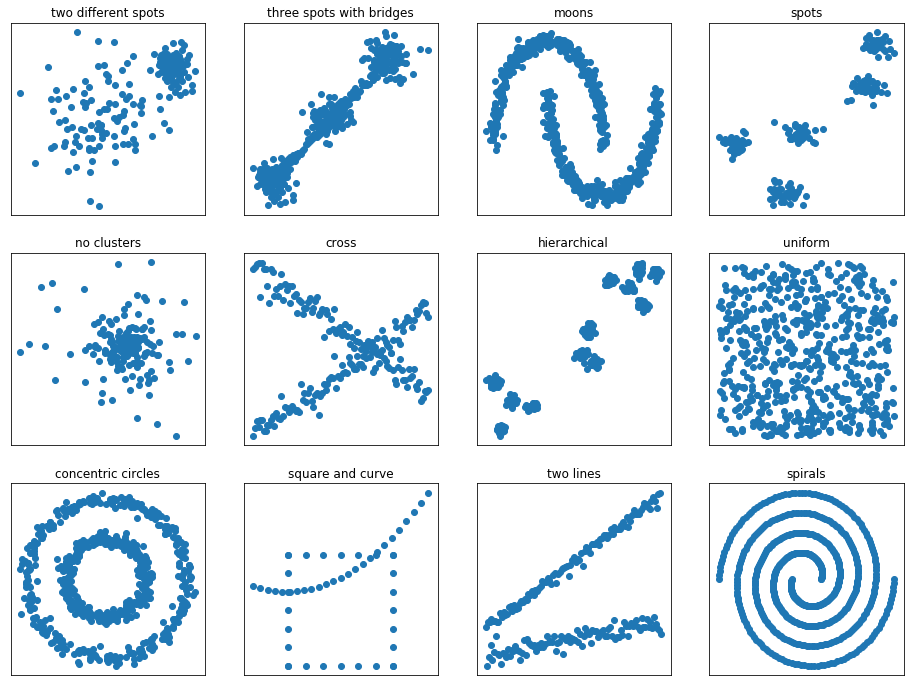

In [10]:
show_plots(samples, False)

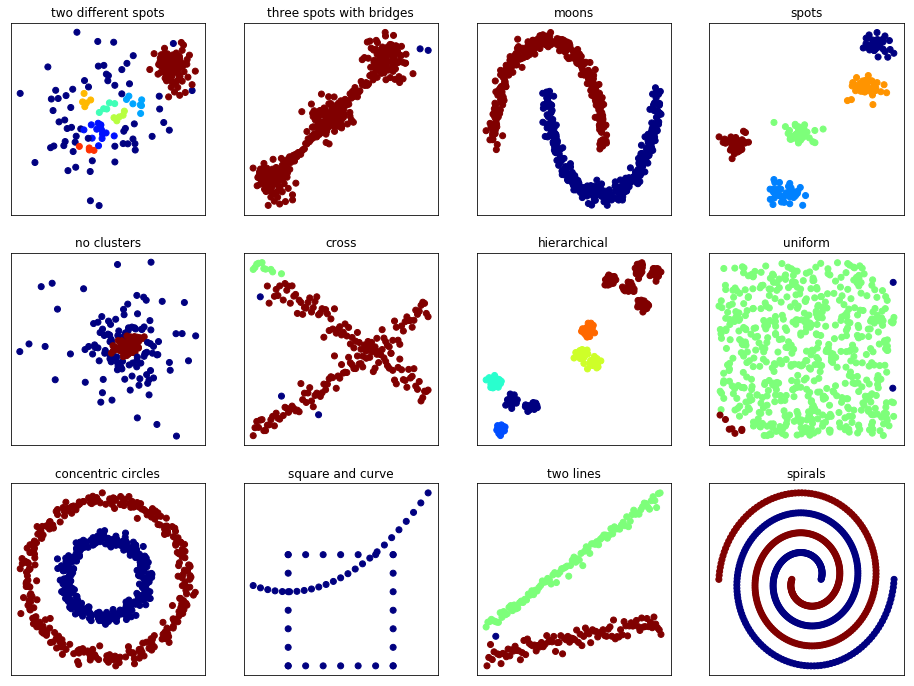

In [16]:
show_plots(samples, True)

## Affinity propagation

_Интуитивное объяснение._

* $S$ - матрица "похожести"; чем больше $S_{ij}$, тем больше $i$-ый и $j$-ый объекты похожи.
* $R$ - матрица "ответственности"; $R_{ij}$ - мера того, насколько $i$ хочет видеть $j$ своим представителем.
* $A$ - матрица "доступности"; $A_{ij}$ - мера того, насколько $j$ готова быть представлителем $i$.

Изначально $R$ и $A$ - нулевые.

$$
\forall i, k:\ r(i,k) \leftarrow s(i,k) - \max_{k' \neq k} \left\{ a(i,k') + s(i,k') \right\}
$$
$$
\forall i, k:\ a(i,k) \leftarrow \min \left( 0, r(k,k) + \sum_{i' \not\in \{i,k\}} \max(0, r(i',k)) \right)
$$
$$
\forall k:\ a(k, k) \leftarrow \sum_{i' \neq k} \max(0, r(i',k))
$$

$$
\forall i:\ c_i \leftarrow \arg\max_k\big(a(i, k) + r(i, k)\big)
$$

![](affinity.png)

[Понятное описание алгоритма](https://habrahabr.ru/post/321216/)

[Реализация](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)

## Mean Shift

![](3d.png)

$$
m(x) = \frac{\sum_{i}K(x_i, x)x_i}{\sum_{i}K(x_i, x)}
$$

$$
K(x, x') = \exp(-c||x - x'||^2)
$$

![](ms_2d_bw_.8.gif)

![](ms_2d_bw_2.gif)

![](parrot.png)

* Легко интерпретируется;
* Число кластеров подбирается алгоритмом;
* Кластеризация зависит от параметров ядра;
* Плохо работает с кластерами сложной формы.

[Реализация](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

## Алгоритм Ланса-Уильямса (иерархическая кластеризация)

_Идея:_ поэтапно объединять наиболее близкие кластеры.

1. $t:=0, C_t=\big\{\{x_1\}, \ldots, \{x_n\}\big\}$;
2. for $t$ in $1, \ldots, n-1$:
3. $\ \ \ \ \ $for all $S\in C_{t-1}$:
4. $\ \ \ \ \ $$\ \ \ \ \ $calculate $R(W, S)$;
5. $\ \ \ \ \ $find in $C_{t-1}$ two nearest clusters: $(U,V):=\arg\min_{U\neq V}R(U, V)$;
6. $\ \ \ \ \ $merge these clusters $W:=U\cup V$; $C_t:=C_{t-1}\cup\{W\}\setminus \{U, V\}$.

**Частичное обучение:** объединяем кластера, только если там нет объектов с разными метками.

![](circles.png)

![](dend.gif)

| ![](dist_1.png)|![](dist_2.png)|![](dist_3.png)|
|:---:|:---:|:---:|
| расстояние ближайшего соседа $R_{б}$ | расстояние дальнего соседа $R_{д}$ | среднее попарное расстояние $R_{с}$ |

| ![](dist_4.png)$R_{ц}=\rho(\mu_U, \mu_V)$|![](dist_4.png)$R_{у}=\frac{\mid U\mid\mid V\mid}{\mid U\mid+\mid V\mid}\rho(\mu_U, \mu_V)$|
|:---:|:---:|
| расстояние между центрами $R_{ц}$ | расстояние Уорда $R_{у}$ |

### Как выбрать функцию расстояния?

* _Монотонность:_ $R_2\le R_3 \le \ldots \le R_{n}$.

* _Расстягивающее отображение:_ $R_t \ge \rho(\mu_U, \mu_V),\ \forall t$.

* _Стягтивающее отображение:_ $R_t \le \rho(\mu_U, \mu_V),\ \forall t$.

Хотелось бы, чтобы отображение было монотонным и растягивающим.

$R_{ц}$ не монотонно; $R_{б}$, $R_{д}$, $R_{с}$, $R_{у}$ - монотонны.

$R_{б}$ - сжимающее; $R_{д}$, $R_{у}$ - растягивающее.

[Реализация](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

![](comparison.png)